In [1]:
#Import Dependencies
import requests
import pandas as pd
from character_lists import char_names
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#Read in csv and character list
j = "ccdc_df.csv"
comics = pd.read_csv(j)

In [3]:
#Check the dataframe's features
comics.head()

,Unnamed: 0,ID,Title,Date,Creator,Character
0,0,17486,X-Men: Phoenix - Warsong (2006),2029,Vc Joe Caramagna,Beast
1,1,17486,X-Men: Phoenix - Warsong (2006),2029,Vc Joe Caramagna,Colossus
2,2,17486,X-Men: Phoenix - Warsong (2006),2029,Vc Joe Caramagna,Cyclops
3,3,17486,X-Men: Phoenix - Warsong (2006),2029,Vc Joe Caramagna,Emma Frost
4,4,17486,X-Men: Phoenix - Warsong (2006),2029,Vc Joe Caramagna,Kitty Pryde


In [5]:
df = pd.DataFrame()
df['Creator']=comics['Creator'].astype('category').cat.codes
df['Character']=comics['Character'].astype('category').cat.codes
df.corr()
#shows very weak correlation between character and creator

,Creator,Character
Creator,1.000000,0.006405
Character,0.006405,1.000000


In [6]:
#See the numbers of appearances of Marvel Characters
char_counts = comics.groupby('Character')['ID'].count()
print(char_counts)

Character
3-D Man                        79
A-Bomb (HAS)                   16
A.I.M.                        247
Aaron Stack                    89
Abomination (Emil Blonsky)    360
                             ... 
Zemo                           42
Zodiak                         10
Zombie (Simon Garth)           18
Zuras                          11
Zzzax                          27
Name: ID, Length: 1189, dtype: int64


In [7]:
big_chars = char_counts.loc[char_counts > 1000]
#char_counts.apply(lambda x: x > 1000)
big_chars.sort_values(ascending = False)

Character
Spider-Man                  20663
X-Men                       18367
Wolverine                   14006
Iron Man                    13858
Captain America             12845
                            ...  
Black Cat                    1062
X-Factor                     1056
Odin                         1052
Banshee (Theresa Rourke)     1042
Doctor Octopus               1024
Name: ID, Length: 104, dtype: int64

In [8]:
top_10 = big_chars.sort_values(ascending = False)
print(top_10[:10])

Character
Spider-Man         20663
X-Men              18367
Wolverine          14006
Iron Man           13858
Captain America    12845
Avengers           10393
Hulk                8945
Thor                8682
Fantastic Four      7160
Daredevil           6768
Name: ID, dtype: int64


In [9]:
#See number of unique creators for characters
char_creators = comics.groupby('Character')['Creator'].nunique()
char_creators.sort_values(ascending=False, inplace=True)
print(char_creators[:10])

Character
Spider-Man         1819
X-Men              1618
Wolverine          1579
Captain America    1504
Iron Man           1487
Avengers           1328
Hulk               1230
Thor               1158
Fantastic Four     1027
Daredevil           991
Name: Creator, dtype: int64


In [10]:
#See number of unique characters for creators
creator_chars = comics.groupby('Creator')['Character'].nunique()
creator_chars.sort_values(ascending=False, inplace=True)
print(creator_chars)

Creator
2998    596
3680    587
1622    547
3716    524
3558    434
       ... 
377       1
3063      1
852       1
847       1
3825      1
Name: Character, Length: 3827, dtype: int64


In [11]:
#Early statistical analysis of the creators and comics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the character counts
#for each creator

# Use groupby and summary statistical methods to calculate the following properties of each creator's character's appearance counts: 
# mean, median, variance, standard deviation, and SEM.

cc_stats = comics.groupby(["Creator", 'Character']).agg(['mean', 'median', 'var', 'std', 'sem'])['Date']


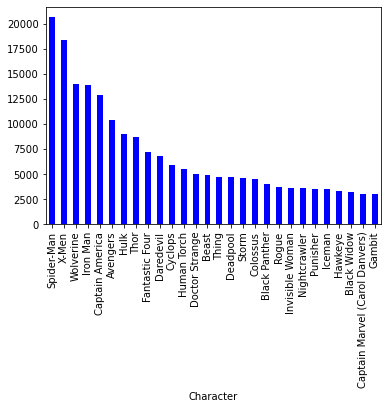

In [12]:
#basic bar plot
huge_chars = char_counts.loc[char_counts > 3000]
#char_counts.apply(lambda x: x > 5000)
x = huge_chars.sort_values(ascending = False)
x.plot(kind='bar', color='b')
plt.show()

C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


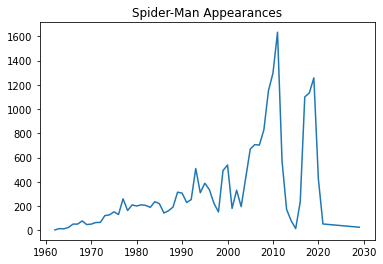

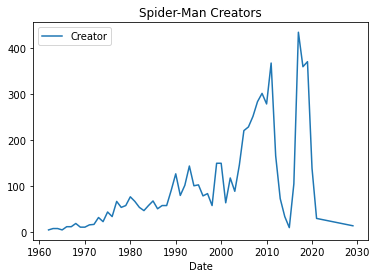

In [13]:
spidey_time = comics[(comics['Character']=='Spider-Man') & (comics['Date'] > 1900)]['Date']

spidey_creates = comics[(comics['Character']=='Spider-Man')& (comics['Date']>1900) & (comics['Creator']!="")]
spidey_crcount = pd.Series(spidey_creates.groupby('Date')['Creator'].nunique())
timeseq = spidey_time.value_counts().sort_index().plot(title='Spider-Man Appearances')
timecreate = spidey_crcount.reset_index()
timecreate.plot(x='Date', y='Creator', title='Spider-Man Creators')


C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


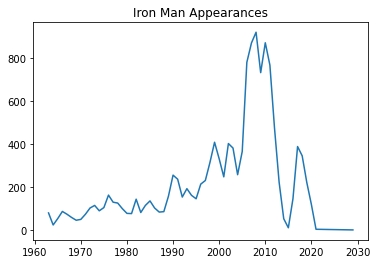

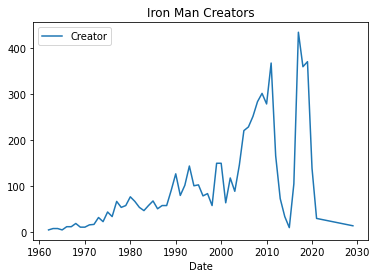

In [14]:
iron_time = comics[(comics['Character']=='Iron Man') & (comics['Date'] > 1900)]['Date']

iron_creates = comics[(comics['Character']=='Iron Man')& (comics['Date']>1900) & (comics['Creator']!="")]
iron_crcount = pd.Series(spidey_creates.groupby('Date')['Creator'].nunique())
timeseq = iron_time.value_counts().sort_index().plot(title='Iron Man Appearances')
timecreate = iron_crcount.reset_index()
timecreate.plot(x='Date', y='Creator', title='Iron Man Creators')

C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


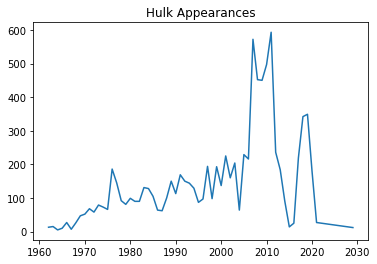

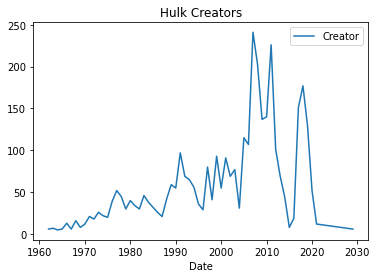

In [15]:
hulk_time = comics[(comics['Character']=='Hulk') & (comics['Date'] > 1900)]['Date']

hulk_creates = comics[(comics['Character']=='Hulk')& (comics['Date']>1900) & (comics['Creator']!="")]
hulk_crcount = pd.Series(hulk_creates.groupby('Date')['Creator'].nunique())
timeseq = hulk_time.value_counts().sort_index().plot(title='Hulk Appearances')
timecreate = hulk_crcount.reset_index()
timecreate.plot(x='Date', y='Creator', title='Hulk Creators')
plt.show()

C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


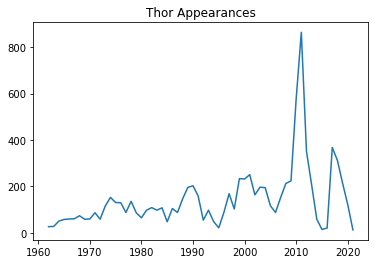

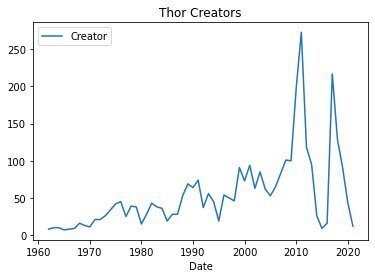

In [16]:
thor_time = comics[(comics['Character']=='Thor') & (comics['Date'] > 1900)]['Date']

thor_creates = comics[(comics['Character']=='Thor')& (comics['Date']>1900) & (comics['Creator']!="")]
thor_crcount = pd.Series(thor_creates.groupby('Date')['Creator'].nunique())
timeseq = thor_time.value_counts().sort_index().plot(title='Thor Appearances')
timecreate = thor_crcount.reset_index()
timecreate.plot(x='Date', y='Creator', title='Thor Creators')
plt.show()


In [17]:
tv_comics = comics.loc[(comics['Character']=='Spider-Man')|
                                (comics['Character']=='Iron Man')|
                                (comics['Character']=='Hulk')|
                                (comics['Character']=='Captain Marvel')|
                                (comics['Character']=='Thor')|
                                (comics['Character']=='Wolverine')|
                                (comics['Character']=='The Wasp')|
                                (comics['Character']=='Falcon')|
                                (comics['Character']=='Vision')|
                                (comics['Character']=='The Thing')]
tv_comics.head()                              

,Unnamed: 0,ID,Title,Date,Creator,Character
5,5,17486,X-Men: Phoenix - Warsong (2006),2029,3680,Wolverine
12,12,17486,X-Men: Phoenix - Warsong (2006),2029,3643,Wolverine
19,19,17486,X-Men: Phoenix - Warsong (2006),2029,3650,Wolverine
26,26,17486,X-Men: Phoenix - Warsong (2006),2029,1308,Wolverine
33,33,17486,X-Men: Phoenix - Warsong (2006),2029,3198,Wolverine


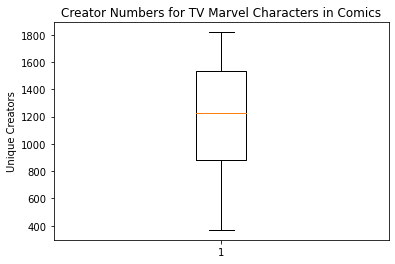

In [18]:
tv_comics_creators = tv_comics.groupby('Character')['Creator'].nunique()
tv_comics_creators.describe()
fig1, ax1 = plt.subplots()
ax1.set_title('Creator Numbers for TV Marvel Characters in Comics')
ax1.set_ylabel('Unique Creators')
ax1.boxplot(tv_comics_creators)
plt.show()

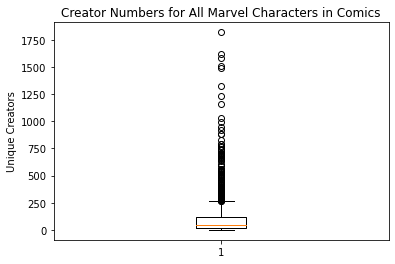

In [19]:
comics_creators = comics.groupby('Character')['Creator'].nunique()
fig1, ax1 = plt.subplots()
ax1.set_title('Creator Numbers for All Marvel Characters in Comics')
ax1.set_ylabel('Unique Creators')
ax1.boxplot(comics_creators)
plt.show()

In [20]:
top_10_comics = comics.loc[(comics['Character']=='Spider-Man')|
                                (comics['Character']=='Iron Man')|
                                (comics['Character']=='Hulk')|
                                (comics['Character']=='Captain America')|
                                (comics['Character']=='Thor')|
                                (comics['Character']=='Wolverine')|
                                (comics['Character']=='X-Men')|
                                (comics['Character']=='Fantastic Four')|
                                (comics['Character']=='Avengers')|
                                (comics['Character']=='Daredevil')]
top_10_comics.head()                    

,Unnamed: 0,ID,Title,Date,Creator,Character
5,5,17486,X-Men: Phoenix - Warsong (2006),2029,3680,Wolverine
6,6,17486,X-Men: Phoenix - Warsong (2006),2029,3680,X-Men
12,12,17486,X-Men: Phoenix - Warsong (2006),2029,3643,Wolverine
13,13,17486,X-Men: Phoenix - Warsong (2006),2029,3643,X-Men
19,19,17486,X-Men: Phoenix - Warsong (2006),2029,3650,Wolverine


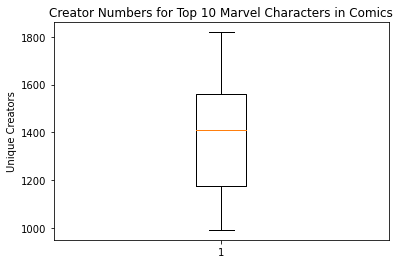

In [21]:
top_comics_creators = top_10_comics.groupby('Character')['Creator'].nunique()
fig1, ax1 = plt.subplots()
ax1.set_title('Creator Numbers for Top 10 Marvel Characters in Comics')
ax1.set_ylabel('Unique Creators')
ax1.boxplot(top_comics_creators)
plt.show()

In [22]:
stats.f_oneway(tv_comics_creators, top_comics_creators, comics_creators)

F_onewayResult(statistic=335.92811981930834, pvalue=1.2289646756059393e-116)

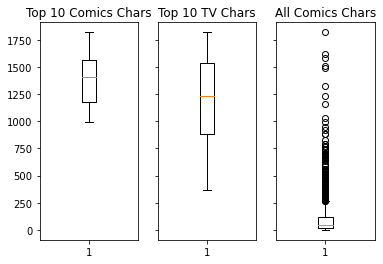

In [23]:
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].boxplot(top_comics_creators)
axs[0].set_title("Top 10 Comics Chars")
axs[1].boxplot(tv_comics_creators)
axs[1].set_title('Top 10 TV Chars')
axs[2].boxplot(comics_creators)
axs[2].set_title('All Comics Chars')
plt.show()

In [34]:
old_comics = comics[(comics['Date'] > 1950) & (comics['Date'] < 2000)]
print(old_comics)

        Unnamed: 0     ID                               Title  Date  Creator  \
4467          4467   6723  The Amazing Spider-Man (1963) #316  1989     3551   
4468          4468   6723  The Amazing Spider-Man (1963) #316  1989     3551   
4469          4469   6723  The Amazing Spider-Man (1963) #316  1989     3551   
4470          4470   6723  The Amazing Spider-Man (1963) #316  1989     3551   
4471          4471   6723  The Amazing Spider-Man (1963) #316  1989     3551   
...            ...    ...                                 ...   ...      ...   
499527      499527  19171         Millie the Model (1945) #37  1952      723   
499528      499528  19171         Millie the Model (1945) #37  1952     3358   
499529      499529  19167         Millie the Model (1945) #33  1952      723   
499530      499530  19167         Millie the Model (1945) #33  1952     3358   
499531      499531  15698                Marvel Boy (1950) #2  1951      337   

               Character  
4467        